# Election poll simulation

Election polls are often conducted previous to elections to predict the outcome of the elections.
The polls are conducted by asking a sample of people who they would vote for.
Often these polls show a big deviation from the actual vote election result. 
This comes down to two reasons:
1. Selection bias can  distort the results of the polls. If the poll is conducted via the internet, only certain target groups are reached and so the sample is distorted.
2. The limited sample size leads to deviation of the poll results.

In this example we only want to evaluate the influence of the limited sample size (the second reason). We therefore assume that there is no selection bias in this example.
First we define the number of participants in our poll.

In [1]:
import numpy as np
from randify import randify, RandomVariable,  cov, plot_pdf

N = 1000

Then we define the true share of voters for each party in the whole population. This is the outcome of the election if every voter went to election. The values in this example are arbitrary.

In [2]:
true_results = {
    "party_A": 0.55,
    "party_B": 0.25,
    "party_C": 0.05,
    "others" : 0.15
}

Now we write a function that simulates one single election poll by using `np.random.choice`. It creates $ N $ samples according to our defined true probabilites and calculates the relative frequencies. These are the result of the election poll.

In [3]:
def election_poll(true_results, N):
    poll_results = true_results.copy()
    sample_results = np.random.choice(list(true_results.keys()), p=list(true_results.values()), size=(N,))
    for party in poll_results.keys():
        poll_results[party] = np.sum(sample_results == party) / N
    return poll_results

Now we simulate the election polls with randify. We set the duration to a 10 (default is 1) to get a more accurate simulation. The result is a RandomVariable holding the election poll results as dictionary. We extract the percentages for all the parties to seperate RandomVariables and visualize the results using randify's `plot_pdf()` function.

Randify: 3206 samples evaluated in 0.547s.


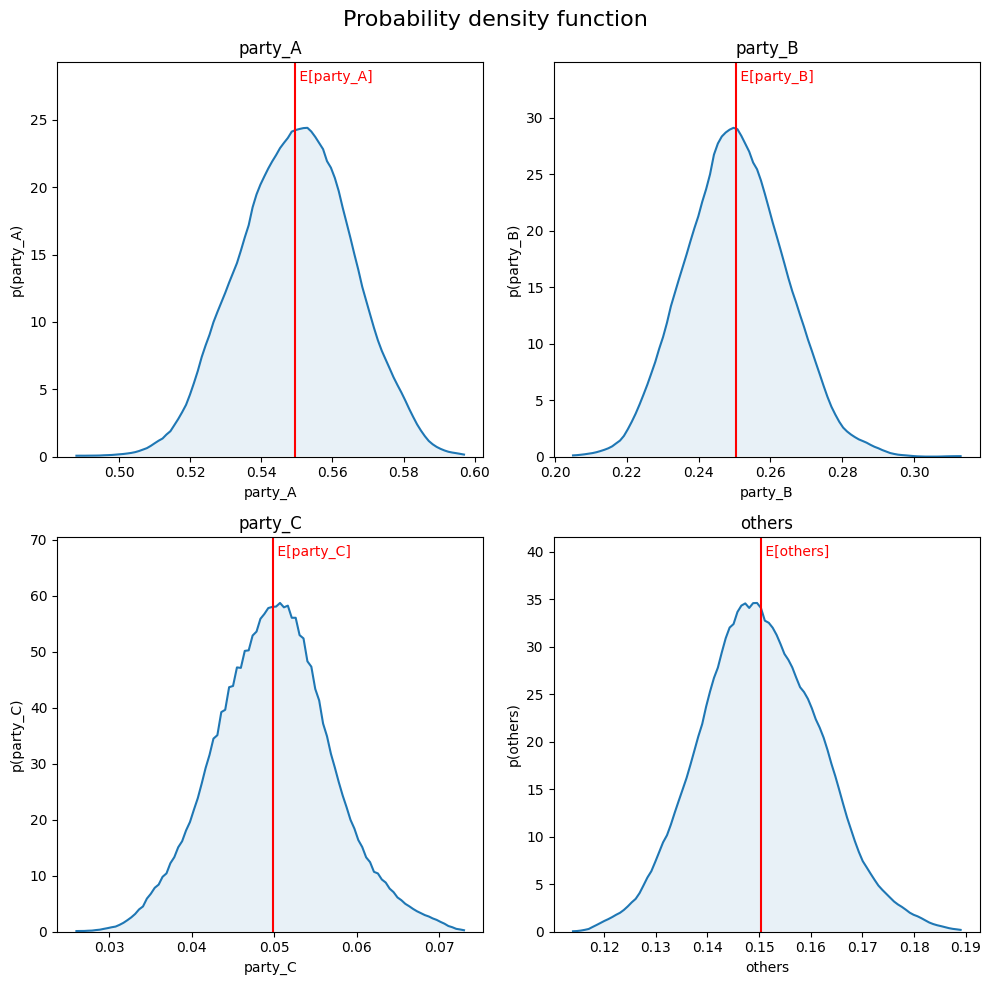

In [4]:
poll_results = randify(election_poll, duration=10)(true_results, N)

party_A_percentage = poll_results["party_A"]
party_B_percentage = poll_results["party_B"]
party_C_percentage = poll_results["party_C"]
others_percentage = poll_results["others"]

plot_pdf(party_A=party_A_percentage,
         party_B=party_B_percentage,
         party_C=party_C_percentage,
         others=others_percentage)

The resulting distributions display a bell shape which results from the underlying multinomial distribution.

To see the possible error of the election error due to the limited sample size we calculate the standard deviations for the results of all parties. We also calculate the covariance matrix between all parties using randify's `cov(*args)` function, which takes any number of RandomVariables as argument and calculates the covariance matrix among these RandomVariables.

In [5]:
print("Standard deviation of polls result for Party A: {:.2f}%".format(np.sqrt(party_A_percentage.variance)*100))
print("Standard deviation of polls result for Party B: {:.2f}%".format(np.sqrt(party_B_percentage.variance)*100))
print("Standard deviation of polls result for Party C: {:.2f}%".format(np.sqrt(party_C_percentage.variance)*100))
print("Standard deviation of polls result for Others: {:.2f}%".format(np.sqrt(others_percentage.variance)*100))

print("\nCovariance matrix:")
print(cov(party_A_percentage, party_B_percentage, party_C_percentage, others_percentage))

Standard deviation of polls result for Party A: 1.55%
Standard deviation of polls result for Party B: 1.37%
Standard deviation of polls result for Party C: 0.69%
Standard deviation of polls result for Others: 1.14%

Covariance matrix:
[[ 2.40332051e-04 -1.33559339e-04 -2.56904030e-05 -8.10823088e-05]
 [-1.33559339e-04  1.86682175e-04 -1.29721153e-05 -4.01507209e-05]
 [-2.56904030e-05 -1.29721153e-05  4.75649670e-05 -8.90244870e-06]
 [-8.10823088e-05 -4.01507209e-05 -8.90244870e-06  1.30135478e-04]]


The results show significant standard deviations for a sample size of $ N=1000 $ asked poll participants. These deviations can solely be attributed to the limited the sample size. We neglected selection bias, but it can further introduce errors.

The covariance matrix shows the results for each party are not independent. Instead negative correlations between all parties are visible. This makes sense, because a too high estimate for the percentage of one party will result in a tendency for too low results for the other partys.